This is a lab created by `girafe.ai` and completed by Denis Barilov in Autumn 2025 as a course assignment.

# <a href="https://girafe.ai/" target="_blank" rel="noopener noreferrer"><img src="https://raw.githubusercontent.com/girafe-ai/ml-course/7096a5df4cada5ee651be1e3215c2f7fb8a7e0bf/logo_margin.svg" alt="girafe-ai logo" width="150px" align="left"></a> [ml-basic course](https://github.com/girafe-ai/ml-course) <a class="tocSkip">

# Lab assignment 01
## Data preprocessing, model training and evaluation

This lab assignment consists of several parts.

In this part you are supposed to work with tabular data: make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions in a chat, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

## 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [ ]:
!pip install ucimlrepo

In [ ]:
import ucimlrepo as uci
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
dataset = uci.fetch_ucirepo(id=149)

print(dataset.metadata.name, '\n')
print(dataset.metadata.abstract, '\n')
print(dataset.metadata.additional_info.summary, '\n')

Statlog (Vehicle Silhouettes) 

3D objects within a 2D image by application of an ensemble of shape feature extractors to the 2D silhouettes of the objects. 

The purpose is to classify a given silhouette as one of four types of vehicle, using  a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.  

HISTORY:

This data was originally gathered at the TI in 1986-87 by JP Siebert. It was partially financed by Barr and Stroud Ltd. The original purpose was to find a method of distinguishing 3D objects within a 2D image by application of an ensemble of shape feature extractors to the 2D silhouettes of the objects. Measures of shape features extracted from example silhouettes of objects to be discriminated were used to generate a classification rule tree by means of computer induction.

This object recognition strategy was successfully used to discriminate between silhouettes of model cars, vans and buses viewed from constrained elevati

In [ ]:
data = dataset.data.features
target = dataset.data.targets

print(data.shape, target.shape)

(846, 18) (846, 1)


In [ ]:
type(dataset.data), type(data), type(target)

(ucimlrepo.dotdict.dotdict,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame)

In [ ]:
data

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO
0,95.0,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197
1,91.0,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199
2,104.0,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196
3,93.0,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207
4,85.0,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93.0,39,87,183,64,8,169,40,20,134,200,422,149,72,7,25,188,195
842,89.0,46,84,163,66,11,159,43,20,159,173,368,176,72,1,20,186,197
843,106.0,54,101,222,67,12,222,30,25,173,228,721,200,70,3,4,187,201
844,86.0,36,78,146,58,7,135,50,18,124,155,270,148,66,0,25,190,195


### 1.1 Data integrity

Check if data is valid. If it is not, remove invalid parts.


In [ ]:
data.isna().sum().sum(), target.isna().sum().sum()

(np.int64(1), np.int64(0))

In [ ]:
data = data.dropna()
target = target.loc[data.index]

data.shape, target.shape

((845, 18), (845, 1))

### 1.2 Train and test sets

Split data into 2 groups using `sklearn`'s infrastructure.

Which size of test set to choose?

The data size is pretty normal so I would use the basic split shares (which is 4 to 1)

In [ ]:
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=RANDOM_STATE)

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(676, 18) (676, 1) (169, 18) (169, 1)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [ ]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO
468,105.0,51,108,201,62,11,220,30,25,163,232,711,202,72,12,16,189,200
788,115.0,52,100,203,62,10,217,31,24,165,229,697,214,72,14,4,188,197
538,101.0,49,103,212,67,10,201,33,23,156,215,601,174,69,4,11,189,196
266,86.0,42,65,116,53,6,152,45,19,141,175,335,172,85,5,4,179,183
352,91.0,46,78,148,61,9,147,45,19,152,168,323,199,70,13,11,189,200
821,104.0,56,96,231,74,11,220,30,25,172,223,713,218,73,6,16,186,195
506,101.0,51,112,201,59,11,214,32,24,162,223,667,194,65,0,36,190,206
826,95.0,49,92,193,62,10,178,37,21,154,200,478,171,64,2,0,198,206
678,86.0,45,70,122,56,7,148,45,19,144,170,324,186,84,9,5,180,183
79,89.0,44,68,113,50,7,150,45,19,147,171,328,189,88,6,5,179,182


In [ ]:
type(X_train_pd), type(X_train), type(data)

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame)

OK...

Methods `describe` and `info` deliver some useful information.

In [ ]:
X_train_pd.describe()

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,93.683432,44.905325,82.072485,168.769231,61.656805,8.705621,168.650888,41.007396,20.568047,148.099112,188.328402,438.834320,174.755917,72.536982,6.313609,12.485207,188.866864,195.640533
std,8.202642,6.150693,15.874109,34.343709,8.343050,5.041225,33.225550,7.888948,2.580230,14.560238,31.394482,175.903338,32.353802,7.800672,4.839883,8.902339,6.209911,7.478923
min,73.000000,33.000000,42.000000,104.000000,47.000000,2.000000,114.000000,26.000000,17.000000,118.000000,131.000000,191.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,140.000000,57.000000,7.000000,146.750000,33.000000,19.000000,137.000000,167.000000,318.750000,150.000000,67.000000,2.000000,5.000000,184.000000,190.000000
50%,93.000000,44.000000,80.000000,166.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,365.000000,174.000000,72.000000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.250000,65.000000,10.000000,198.250000,46.000000,23.000000,160.000000,217.000000,590.500000,198.000000,75.250000,9.000000,18.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,59.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,204.000000,211.000000


In [ ]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 676 entries, 468 to 102
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   COMPACTNESS                       676 non-null    float64
 1   CIRCULARITY                       676 non-null    int64  
 2   DISTANCE CIRCULARITY              676 non-null    int64  
 3   RADIUS RATIO                      676 non-null    int64  
 4   PR.AXIS ASPECT RATIO              676 non-null    int64  
 5   MAX.LENGTH ASPECT RATIO           676 non-null    int64  
 6   SCATTER RATIO                     676 non-null    int64  
 7   ELONGATEDNESS                     676 non-null    int64  
 8   PR.AXIS RECTANGULARITY            676 non-null    int64  
 9   MAX.LENGTH RECTANGULARITY         676 non-null    int64  
 10  SCALED VARIANCE ALONG MAJOR AXIS  676 non-null    int64  
 11  SCALED VARIANCE ALONG MINOR AXIS  676 non-null    int64  
 12  SCALED RADI

## 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

### 2.0. Data preprocessing

Apply transformations to the dataset (if necessary).

Briefly explain the transformations

Let's explore the data separately by the target classes.

In [ ]:
uni = y_train['class'].unique()
uni

array(['saab', 'opel', 'bus', 'van'], dtype=object)

In [ ]:
X_train[y_train['class'] == uni[0]].describe()

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,97.751479,45.928994,89.739645,182.224852,61.183432,8.911243,181.248521,37.988166,21.579882,149.644970,198.260355,502.426036,180.532544,69.384615,7.514793,15.360947,189.911243,198.473373
std,8.970707,6.750286,16.544411,30.308675,4.296533,2.145966,31.763970,7.522971,2.465442,16.077324,27.790944,164.280707,33.523807,4.917171,5.635883,10.031196,4.867084,6.335900
min,78.000000,33.000000,50.000000,104.000000,51.000000,4.000000,115.000000,30.000000,17.000000,118.000000,135.000000,193.000000,115.000000,59.000000,0.000000,0.000000,179.000000,182.000000
25%,90.000000,40.000000,77.000000,162.000000,58.000000,7.000000,154.000000,31.000000,19.000000,134.000000,177.000000,357.000000,151.000000,66.000000,3.000000,7.000000,187.000000,196.000000
50%,98.000000,46.000000,96.000000,190.000000,61.000000,9.000000,186.000000,36.000000,22.000000,151.000000,207.000000,518.000000,184.000000,70.000000,6.000000,14.000000,189.000000,199.000000
75%,105.000000,53.000000,104.000000,203.000000,64.000000,11.000000,213.000000,43.000000,24.000000,164.000000,223.000000,664.000000,212.000000,72.000000,12.000000,23.000000,193.000000,203.000000
max,119.000000,56.000000,112.000000,234.000000,73.000000,12.000000,222.000000,59.000000,25.000000,175.000000,235.000000,721.000000,240.000000,86.000000,22.000000,41.000000,203.000000,211.000000


Probably 'SKEWNESS ... MINOR' has blowout in high end.

In [ ]:
X_train[y_train['class'] == uni[1]].describe()

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,94.803371,46.398876,88.516854,179.219101,60.719101,8.820225,181.376404,38.101124,21.522472,150.780899,197.876404,504.623596,179.050562,70.264045,6.443820,14.707865,189.123596,196.955056
std,8.366640,7.238738,15.973574,31.522251,4.840948,2.020023,33.168444,7.872637,2.582438,18.185866,29.419936,174.137224,34.671546,5.195929,5.124406,10.165525,5.510791,5.801636
min,73.000000,34.000000,42.000000,110.000000,50.000000,3.000000,114.000000,30.000000,17.000000,119.000000,131.000000,191.000000,120.000000,61.000000,0.000000,0.000000,176.000000,183.000000
25%,88.000000,39.000000,77.000000,155.250000,57.000000,7.000000,151.250000,31.000000,19.000000,133.250000,174.000000,340.500000,145.250000,66.000000,2.000000,5.250000,186.000000,194.000000
50%,96.000000,47.000000,94.000000,183.000000,60.000000,9.000000,186.000000,35.000000,22.000000,149.500000,207.500000,520.000000,184.500000,71.000000,5.500000,14.000000,189.000000,197.500000
75%,102.000000,53.000000,103.000000,204.000000,64.000000,10.000000,213.750000,44.000000,24.000000,166.000000,223.000000,672.250000,208.500000,73.000000,10.000000,22.000000,192.000000,201.000000
max,111.000000,59.000000,110.000000,232.000000,74.000000,13.000000,227.000000,59.000000,25.000000,188.000000,241.000000,757.000000,250.000000,87.000000,21.000000,39.000000,204.000000,210.000000


In [ ]:
X_train[y_train['class'] == uni[1]].describe()

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,94.803371,46.398876,88.516854,179.219101,60.719101,8.820225,181.376404,38.101124,21.522472,150.780899,197.876404,504.623596,179.050562,70.264045,6.443820,14.707865,189.123596,196.955056
std,8.366640,7.238738,15.973574,31.522251,4.840948,2.020023,33.168444,7.872637,2.582438,18.185866,29.419936,174.137224,34.671546,5.195929,5.124406,10.165525,5.510791,5.801636
min,73.000000,34.000000,42.000000,110.000000,50.000000,3.000000,114.000000,30.000000,17.000000,119.000000,131.000000,191.000000,120.000000,61.000000,0.000000,0.000000,176.000000,183.000000
25%,88.000000,39.000000,77.000000,155.250000,57.000000,7.000000,151.250000,31.000000,19.000000,133.250000,174.000000,340.500000,145.250000,66.000000,2.000000,5.250000,186.000000,194.000000
50%,96.000000,47.000000,94.000000,183.000000,60.000000,9.000000,186.000000,35.000000,22.000000,149.500000,207.500000,520.000000,184.500000,71.000000,5.500000,14.000000,189.000000,197.500000
75%,102.000000,53.000000,103.000000,204.000000,64.000000,10.000000,213.750000,44.000000,24.000000,166.000000,223.000000,672.250000,208.500000,73.000000,10.000000,22.000000,192.000000,201.000000
max,111.000000,59.000000,110.000000,232.000000,74.000000,13.000000,227.000000,59.000000,25.000000,188.000000,241.000000,757.000000,250.000000,87.000000,21.000000,39.000000,204.000000,210.000000


Surely 'MAX.LENGTH ...' has blowout in high end and the 'SKEWNESS ...' are a little bad too.

In [ ]:
X_train[y_train['class'] == uni[3]].describe()

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,90.627329,42.111801,73.037267,146.801242,61.254658,9.931677,141.329193,48.074534,18.565217,145.186335,163.981366,297.279503,157.701863,73.298137,6.354037,9.701863,188.677019,195.819876
std,3.874306,4.227874,10.976616,32.287153,12.411325,7.978976,14.429040,4.843233,1.053462,11.333691,21.428215,57.608941,23.415498,9.470246,4.615747,6.279774,6.538924,7.529017
min,82.000000,34.000000,44.000000,105.000000,48.000000,2.000000,114.000000,42.000000,17.000000,121.000000,134.000000,194.000000,109.000000,61.000000,0.000000,0.000000,176.000000,182.000000
25%,88.000000,39.000000,66.000000,131.000000,56.000000,7.000000,130.000000,44.000000,18.000000,137.000000,154.000000,247.000000,138.000000,67.000000,2.000000,5.000000,183.000000,191.000000
50%,90.000000,42.000000,75.000000,142.000000,59.000000,9.000000,140.000000,47.000000,18.000000,145.000000,164.000000,296.000000,159.000000,73.000000,6.000000,9.000000,187.000000,196.000000
75%,93.000000,46.000000,82.000000,159.000000,64.000000,10.000000,156.000000,52.000000,20.000000,155.000000,172.000000,354.000000,177.000000,76.000000,9.000000,14.000000,193.000000,201.000000
max,100.000000,50.000000,92.000000,333.000000,138.000000,55.000000,163.000000,58.000000,20.000000,170.000000,320.000000,389.000000,203.000000,135.000000,19.000000,29.000000,204.000000,210.000000


Have to clean data from blowouts in theese particular 3 columns. I will eliminate rows using '3-sigma' rule.

In [ ]:
columns_to_clean = [
    'MAX.LENGTH ASPECT RATIO',
    'SKEWNESS ABOUT MAJOR AXIS',
    'SKEWNESS ABOUT MINOR AXIS'
]

blowouts_mask = np.abs(X_train[columns_to_clean] - X_train[columns_to_clean].mean()) > 3 * X_train[columns_to_clean].std()
blowouts_mask.sum()

,0
MAX.LENGTH ASPECT RATIO,9
SKEWNESS ABOUT MAJOR AXIS,6
SKEWNESS ABOUT MINOR AXIS,6


A dozen of rows is decent.

In [ ]:
clean_mask = ~blowouts_mask.any(axis=1)
X_clean = X_train[clean_mask].copy()
y_clean = y_train[clean_mask].copy()

We have no need of encoding because all the columns are real numeric data.

Now the handful trick is normalizing the data. I will use Standart Scaler (convenient one).

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_clean_scaled = scaler.transform(X_clean)
X_test_scaled = scaler.transform(X_test)

X_clean_scaled

array([[ 1.38064629,  0.99162607,  1.63453039, ...,  0.39510916,
         0.02145517,  0.58333202],
       [ 2.60066837,  1.15432977,  1.13019192, ..., -0.95384937,
        -0.13969699,  0.18190775],
       [ 0.89263746,  0.66621868,  1.31931885, ..., -0.1669569 ,
         0.02145517,  0.04809965],
       ...,
       [-1.4254045 ,  0.0154039 , -0.88716196, ..., -1.40350222,
        -1.26776207, -1.55759744],
       [-1.05939787, -1.28622566, -0.88716196, ...,  0.17028273,
         0.98836809,  0.98475629],
       [ 0.038622  , -0.47270719, -0.88716196, ..., -0.84143616,
         0.50491163,  0.04809965]])

Now we are ready to fit models

### 2.1. Basic logistic regression

* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression:\
`multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

Firstly, we'll find the best parameters

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

MAX_ITER = 1000

model_regression = LogisticRegression(max_iter=MAX_ITER, random_state=RANDOM_STATE)

param_grid = {
    'C': np.logspace(-2, 3, num=6),
    'solver': ['lbfgs', 'liblinear']
}

grid_search = GridSearchCV(
    estimator=model_regression,
    param_grid=param_grid,
    cv=5,  # default value
    scoring='accuracy'
)

grid_search.fit(X_clean_scaled, y_clean['class'])
grid_search.best_params_

{'C': np.float64(100.0), 'solver': 'lbfgs'}

In [ ]:
model_regression_best = grid_search.best_estimator_

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

y_pred = model_regression_best.predict(X_test_scaled)

accuracy_regression = accuracy_score(y_test['class'], y_pred)
f1_regression = f1_score(y_test['class'], y_pred, average='weighted')

accuracy_regression, f1_regression

(0.8047337278106509, 0.8025519319431874)

In [ ]:
y_train[y_train['class'] == uni[0]].shape, y_train[y_train['class'] == uni[1]].shape, y_train[y_train['class'] == uni[2]].shape, y_train[y_train['class'] == uni[3]].shape

((169, 1), (178, 1), (168, 1), (161, 1))

The shares of data by class are approximately equal, so baseline model would probabply have accuracy about .25.

Pretty good (a lot better, than baseline), but not awesome.

In [ ]:
# You might use this command to install scikit-plot.
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding
# virtual environment instead

# ! pip install scikit-plot

In [ ]:
!pip install scikit-plot

In [ ]:
predicted_proba_regression = model_regression_best.predict_proba(X_test_scaled)
predicted_proba_regression.shape

(169, 4)

In [ ]:
# import scikitplot as skplt
# import matplotlib.pyplot as plt

# skplt.metrics.plot_roc(y_test, predicted_proba)
# plt.title("ROC-кривая")
# plt.show()

Caused an error because this function is now depreceted.

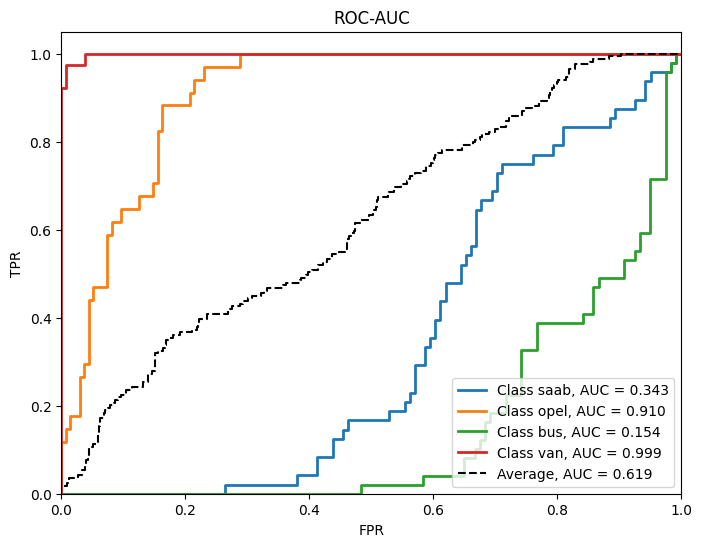

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test['class'], classes=uni)

plt.figure(figsize=(8, 6))
for i, cls in enumerate(uni):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], predicted_proba_regression[:, i])
    auc_cls = roc_auc_score(y_test_bin[:, i], predicted_proba_regression[:, i])
    plt.plot(fpr, tpr, lw=2, label=f'Class {cls}, AUC = {auc_cls:.3f}')

fpr_avg, tpr_avg, _ = roc_curve(y_test_bin.ravel(), predicted_proba_regression.ravel())
auc_avg = roc_auc_score(y_test_bin, predicted_proba_regression, average='micro')
plt.plot(fpr_avg, tpr_avg, color='black', linestyle='--', label=f'Average, AUC = {auc_avg:.3f}')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-AUC')
plt.legend(loc='lower right')
plt.show()

We can see good detection of 'van' and 'opel', but high misunderstanding the remaining two classes. The features of 'ope' and 'bus' are too similar (for this particular model).

### 2.2. PCA: explained variance plot

Apply the PCA to the train part of the data.

Build the explaided variance plot.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(random_state=RANDOM_STATE)
pca.fit(X_clean_scaled)

explained_variance = pca.explained_variance_ratio_

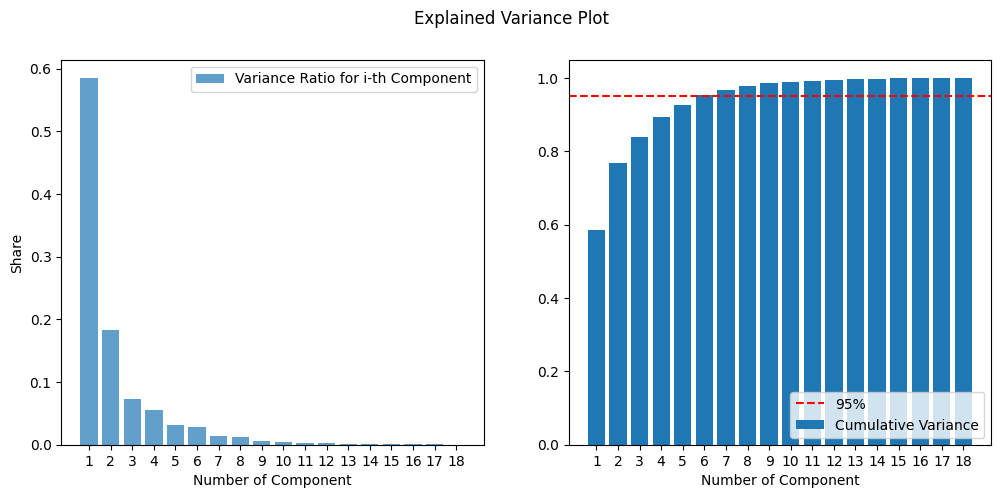

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, label='Variance Ratio for i-th Component')
ax1.set_xlabel('Number of Component')
ax1.set_ylabel('Share')
ax1.legend(loc='upper right')

ax2.bar(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), label='Cumulative Variance')
ax2.axhline(0.95, linestyle='--', color='r', label='95%')
ax2.set_xlabel('Number of Component')
ax2.legend(loc='lower right')

ax1.set_xticks(range(1, len(explained_variance) + 1))
ax2.set_xticks(range(1, len(explained_variance) + 1))

fig.suptitle('Explained Variance Plot')
plt.show()

### 2.3. PCA trasformation

Select the appropriate number of components.

Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train`, `val` and `test` parts.*

6 components explain the vast majority of variance - 95% is enough. Data is already normalized.

In [ ]:
n_components = 6

pca = PCA(n_components=n_components, random_state=RANDOM_STATE)
X_train_pca = pca.fit_transform(X_clean_scaled)
X_test_pca = pca.transform(X_test_scaled)

Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.

Nah, according to the notebook structure pipeline would not be convinient.

### 2.4. Logistic regression on PCA-preprocessed data

* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.
* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression:\
`multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [ ]:
param_grid = {
    'C': np.logspace(-2, 3, num=6),
}

model_regression = LogisticRegression(
    multi_class='multinomial',
    solver='saga',
    tol=1e-3,
    max_iter=MAX_ITER,
    random_state=RANDOM_STATE
)

grid_search = GridSearchCV(
    estimator=model_regression,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)

grid_search.fit(X_train_pca, y_clean['class'])
grid_search.best_params_

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

{'C': np.float64(0.1)}

A lot of deprecation warnings...

In [ ]:
model_pca_regression_best = grid_search.best_estimator_

y_pred = model_pca_regression_best.predict(X_test_pca)

accuracy_pca_regression = accuracy_score(y_test['class'], y_pred)
f1_pca_regression = f1_score(y_test['class'], y_pred, average='weighted')

accuracy_pca_regression, f1_pca_regression

(0.621301775147929, 0.608249289816779)

Oh, that is worse. Probably the features are not so correlated and therefore PCA does not do good.

In [ ]:
predicted_proba_pca_regression = model_pca_regression_best.predict_proba(X_test_pca)

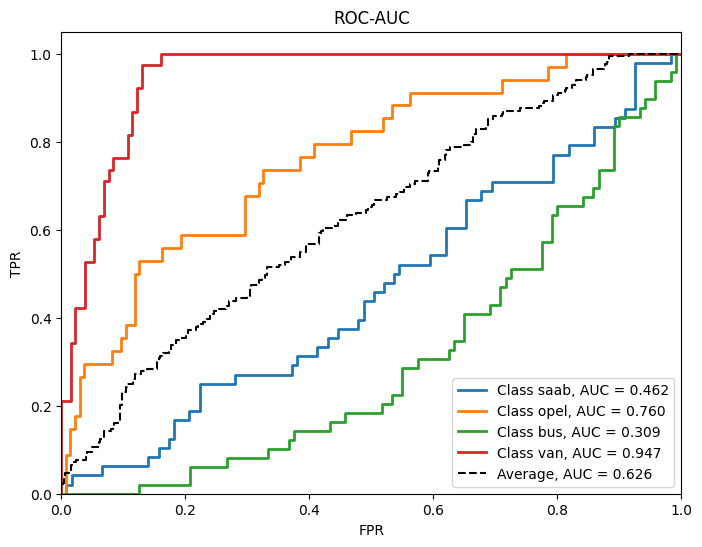

In [ ]:
plt.figure(figsize=(8, 6))
for i, cls in enumerate(uni):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], predicted_proba_pca_regression[:, i])
    auc_cls = roc_auc_score(y_test_bin[:, i], predicted_proba_pca_regression[:, i])
    plt.plot(fpr, tpr, lw=2, label=f'Class {cls}, AUC = {auc_cls:.3f}')

fpr_avg, tpr_avg, _ = roc_curve(y_test_bin.ravel(), predicted_proba_pca_regression.ravel())
auc_avg = roc_auc_score(y_test_bin, predicted_proba_pca_regression, average='micro')
plt.plot(fpr_avg, tpr_avg, color='black', linestyle='--', label=f'Average, AUC = {auc_avg:.3f}')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-AUC')
plt.legend(loc='lower right')
plt.show()

Model is now not that certain on 'van' and 'opel'.

### 2.5. Decision tree

* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=RANDOM_STATE)

param_grid = {
    'max_depth': np.linspace(3, 21, num=7, dtype=int)
}

grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)

grid_search.fit(X_clean_scaled, y_clean)
model_decision_tree = grid_search.best_estimator_
grid_search.best_params_

{'max_depth': np.int64(15)}

In [ ]:
y_pred = model_decision_tree.predict(X_test_scaled)

accuracy_decision_tree = accuracy_score(y_test['class'], y_pred)
f1_decision_tree = f1_score(y_test['class'], y_pred, average='weighted')

accuracy_decision_tree, f1_decision_tree

(0.6568047337278107, 0.6597783639488922)

The basic logistic regression is still the best (of those that are tested).

### 2.6. Bagging

Here starts the ensembling part. You need to use [BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ with step 5.

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble?

In [ ]:
N_min = 2
N_max = 100
step = 5
N_ground = N_min - N_min % step
N_roof = N_max + step - N_max % step
Ns = np.arange(N_ground, N_roof, step)
Ns[0], Ns[-1] = N_min, N_max
Ns

array([  2,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100])

I am not completely sure that fixed random state for the whole experiment would work properly. In this case I will create a local RNG.

In [ ]:
rng = np.random.default_rng(seed=RANDOM_STATE)

Let us start with regression. And I assume that the process will be much longer than our previous experiments, so I will run with tqdm progress bar.

In [ ]:
from sklearn.ensemble import BaggingClassifier
from tqdm import tqdm

regression_base = LogisticRegression(
    solver='saga',
    tol=1e-3,
    max_iter=MAX_ITER,
    random_state=rng
)

regression_param_grid = {
    'estimator__C': np.logspace(-2, 3, num=6),
}

ensembles_regression = []

def train_all(base, grid, history):
    for N in tqdm(Ns):
        bagging = BaggingClassifier(estimator=base, n_estimators=N, random_state=rng.integers(low=0, high=100))

        grid_search = GridSearchCV(
            estimator=bagging,
            param_grid=grid,
            cv=5,
            scoring='accuracy'
        )

        grid_search.fit(X_clean_scaled, y_clean['class'])

        best_ensemble = grid_search.best_estimator_

        history.append({
            "model": best_ensemble,
            "params": grid_search.best_params_,
            "N": N
        })

# train_all(regression_base, regression_param_grid, ensembles_regression)

I am using the google colab (because my laptop is a bit old) and the training process was waaay too slow. Unfortunately I have to tighten the N grid. Will use logspace because smaller N fits faster than the larger ones.

In [ ]:
less_Ns = np.logspace(1, 7, 10, base=2, dtype=int)
less_Ns[-1] = N_max
less_Ns

array([  2,   3,   5,   8,  12,  20,  32,  50,  80, 100])

In [ ]:
def train_all(base, grid, history, **params):
    for N in tqdm(params.get("Ns", Ns)):
        bagging = BaggingClassifier(estimator=base, n_estimators=N, random_state=rng.integers(low=0, high=100))

        grid_search = GridSearchCV(
            estimator=bagging,
            param_grid=grid,
            cv=5,
            scoring='accuracy'
        )

        grid_search.fit(X_clean_scaled, y_clean['class'])

        best_ensemble = grid_search.best_estimator_

        history.append({
            "model": best_ensemble,
            "params": grid_search.best_params_,
            "N": N
        })

In [ ]:
train_all(regression_base, regression_param_grid, ensembles_regression, Ns=less_Ns)

 70%|███████   | 7/10 [03:26<02:06, 42.06s/it]/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
 80%|████████  | 8/10 [05:14<02:05, 62.91s/it]/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-pa

Now the decision tree.

In [ ]:
dt_base = DecisionTreeClassifier(random_state=RANDOM_STATE)

dt_param_grid = {
    'estimator__max_depth': np.linspace(6, 18, num=5, dtype=int)
}

ensembles_dt = []

train_all(dt_base, dt_param_grid, ensembles_dt, Ns=less_Ns)

100%|██████████| 10/10 [01:17<00:00,  7.77s/it]


Hmm, it was faster (10 times faster actually).

In [ ]:
for ensemble in ensembles_regression:
    y_pred = ensemble["model"].predict(X_test_scaled)

    ensemble['accuracy'] = accuracy_score(y_test['class'], y_pred)
    ensemble['f1'] = f1_score(y_test['class'], y_pred, average='weighted')

for ensemble in ensembles_dt:
    y_pred = ensemble["model"].predict(X_test_scaled)

    ensemble['accuracy'] = accuracy_score(y_test['class'], y_pred)
    ensemble['f1'] = f1_score(y_test['class'], y_pred, average='weighted')

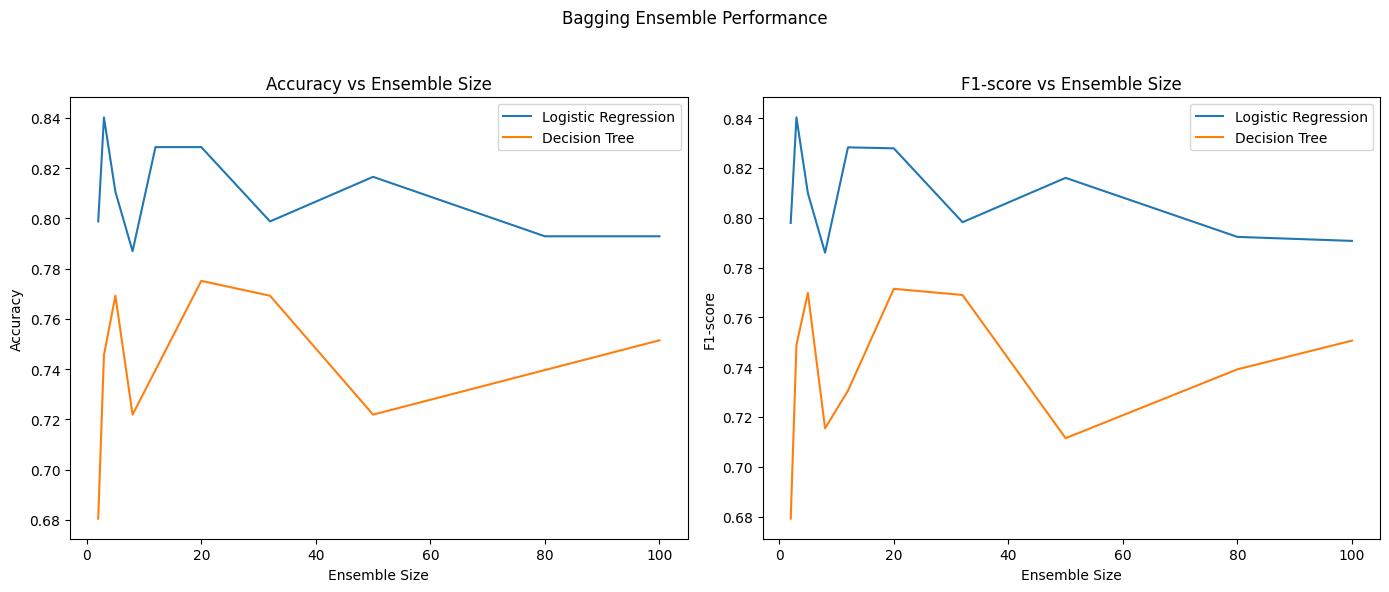

In [ ]:
acc_reg = [ensemble['accuracy'] for ensemble in ensembles_regression]
f1_reg  = [ensemble['f1'] for ensemble in ensembles_regression]

acc_dt = [ensemble['accuracy'] for ensemble in ensembles_dt]
f1_dt  = [ensemble['f1'] for ensemble in ensembles_dt]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

ax1.plot(less_Ns, acc_reg, label='Logistic Regression')
ax1.plot(less_Ns, acc_dt, label='Decision Tree')

ax1.set_title('Accuracy vs Ensemble Size')
ax1.set_xlabel('Ensemble Size')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2.plot(less_Ns, f1_reg, label='Logistic Regression')
ax2.plot(less_Ns, f1_dt, label='Decision Tree',)

ax2.set_title('F1-score vs Ensemble Size')
ax2.set_xlabel('Ensemble Size')
ax2.set_ylabel('F1-score')
ax2.legend()

fig.suptitle('Bagging Ensemble Performance')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

- It is interesting that the best performance among the regression ensembles shows the one with only a few estimators (probably it is an accident). On the other hand, the Decision Tree ensemble with 20-ish trees shows the best scores. Unsurprisingly, too much estimators are too much.
- The models in ensemble together behave differennt caompared to when the are separeted thus the optimal parameters for a single base model may not be the best for the usage in ensemble.

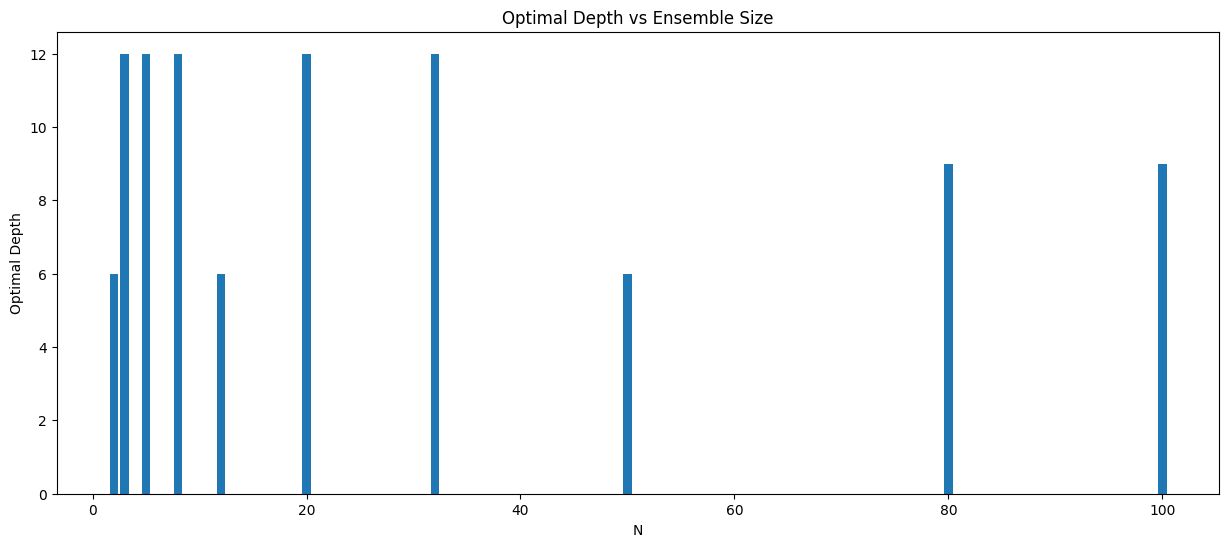

In [ ]:
plt.figure(figsize=(15, 6))
plt.bar(less_Ns, [ensemble["params"]["estimator__max_depth"] for ensemble in ensembles_dt])
plt.xlabel('N')
plt.ylabel('Optimal Depth')
plt.title('Optimal Depth vs Ensemble Size')
plt.show()

### 2.7. Random Forest

Now we will work with the [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

* Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

def train_random_forests(grid, history, **params):
    for N in tqdm(params.get("Ns", Ns)):
        model = RandomForestClassifier(n_estimators=N, random_state=rng.integers(low=0, high=100))

        grid_search = GridSearchCV(
            estimator=model,
            param_grid=grid,
            cv=5,
            scoring='accuracy'
        )

        grid_search.fit(X_clean_scaled, y_clean['class'])

        best_model = grid_search.best_estimator_

        history.append({
            "model": best_model,
            "params": grid_search.best_params_,
            "N": N
        })

random_forest_param_grid = {
    'max_depth': np.linspace(6, 18, num=5, dtype=int)
}

random_forests = []

train_random_forests(random_forest_param_grid, random_forests, Ns=less_Ns)

100%|██████████| 10/10 [00:30<00:00,  3.10s/it]


In [ ]:
for ensemble in random_forests:
    y_pred = ensemble["model"].predict(X_test_scaled)

    ensemble['accuracy'] = accuracy_score(y_test['class'], y_pred)
    ensemble['f1'] = f1_score(y_test['class'], y_pred, average='weighted')

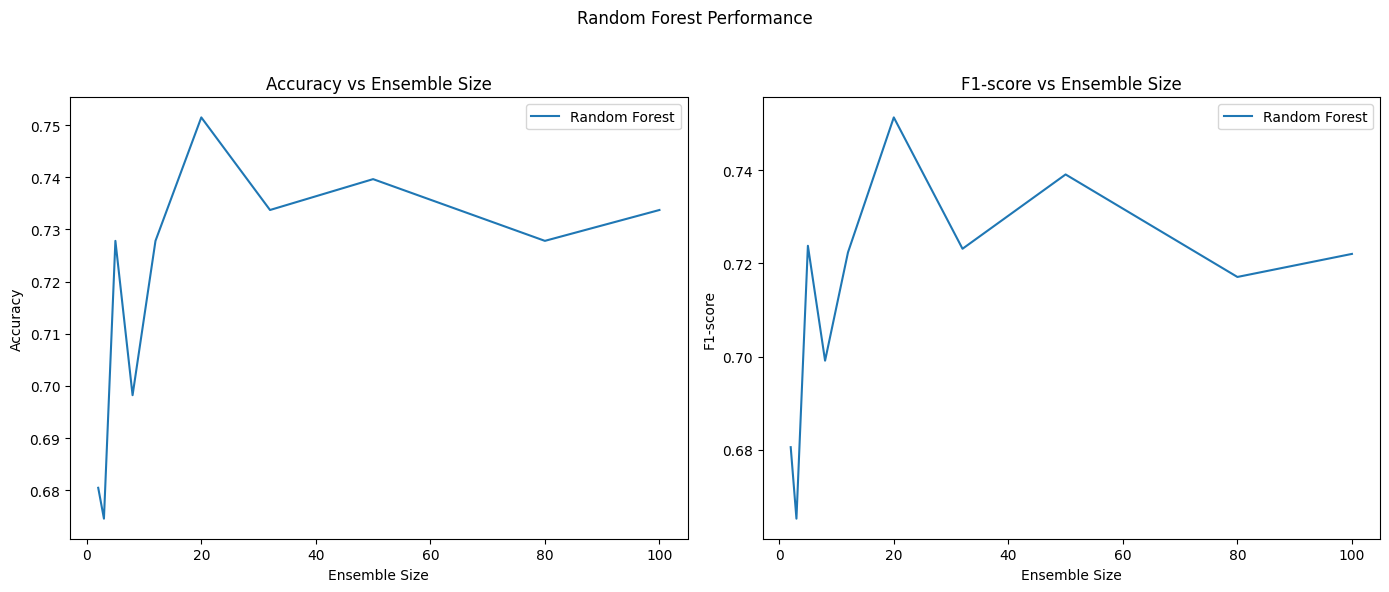

In [ ]:
acc_forest = [ensemble['accuracy'] for ensemble in random_forests]
f1_forest  = [ensemble['f1'] for ensemble in random_forests]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

ax1.plot(less_Ns, acc_forest, label='Random Forest')

ax1.set_title('Accuracy vs Ensemble Size')
ax1.set_xlabel('Ensemble Size')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2.plot(less_Ns, f1_forest, label='Random Forest',)

ax2.set_title('F1-score vs Ensemble Size')
ax2.set_xlabel('Ensemble Size')
ax2.set_ylabel('F1-score')
ax2.legend()

fig.suptitle('Random Forest Performance')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

We have similar to the Decision Tree ensemble results. Extra randomness did not do something.

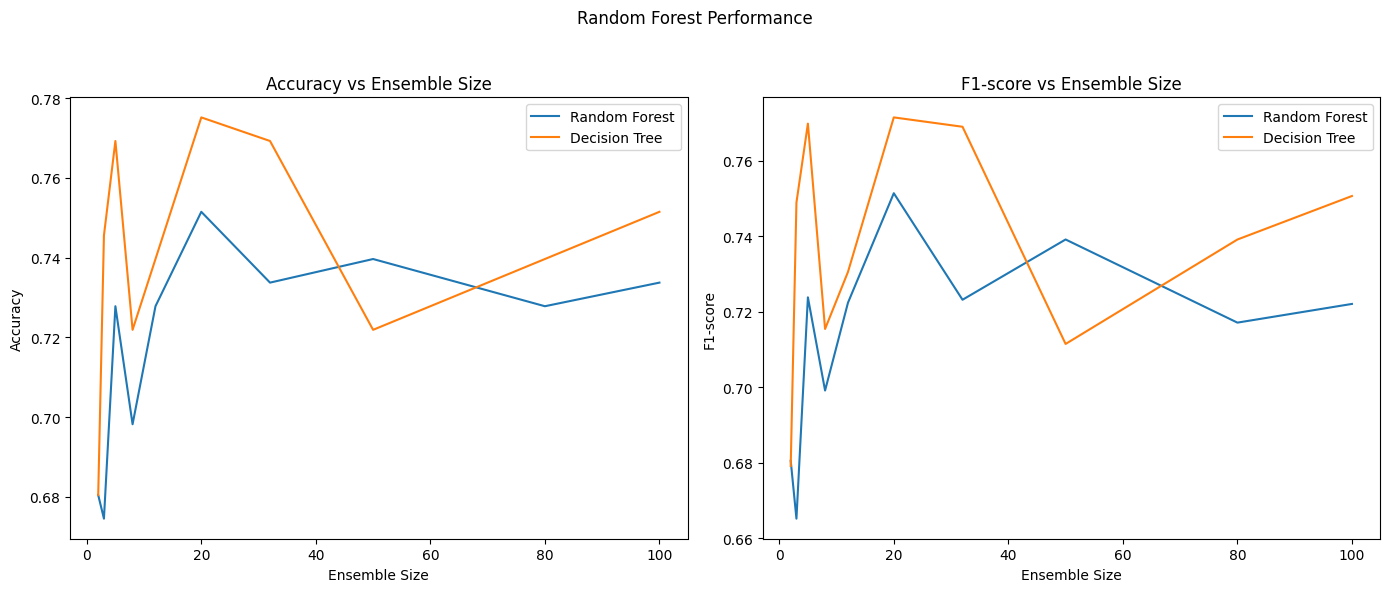

In [ ]:
acc_forest = [ensemble['accuracy'] for ensemble in random_forests]
f1_forest  = [ensemble['f1'] for ensemble in random_forests]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

ax1.plot(less_Ns, acc_forest, label='Random Forest')
ax1.plot(less_Ns, acc_dt, label='Decision Tree')

ax1.set_title('Accuracy vs Ensemble Size')
ax1.set_xlabel('Ensemble Size')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2.plot(less_Ns, f1_forest, label='Random Forest',)
ax2.plot(less_Ns, f1_dt, label='Decision Tree',)

ax2.set_title('F1-score vs Ensemble Size')
ax2.set_xlabel('Ensemble Size')
ax2.set_ylabel('F1-score')
ax2.legend()

fig.suptitle('Random Forest Performance')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Even slightly worse in the most cases.

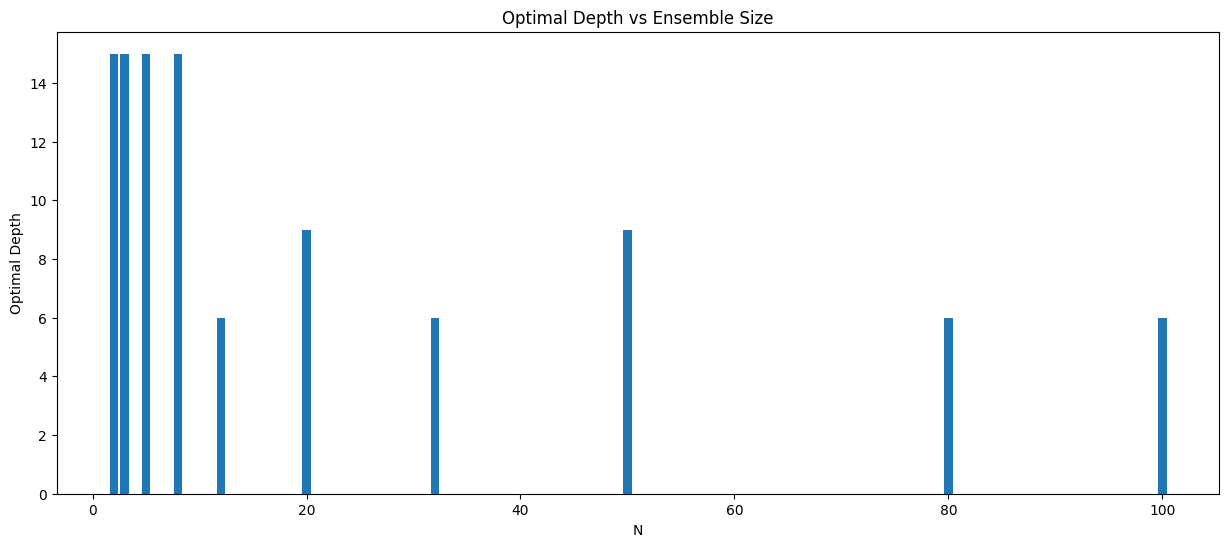

In [ ]:
plt.figure(figsize=(15, 6))
plt.bar(less_Ns, [ensemble["params"]["max_depth"] for ensemble in random_forests])
plt.xlabel('N')
plt.ylabel('Optimal Depth')
plt.title('Optimal Depth vs Ensemble Size')
plt.show()

### 2.8. Learning curve

Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected. First train it on first part, then on first and second parts combined (so the train size in increased by 2 times), first 3 parts and so on.

* You may use `sklearn`'s [readymade function](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html). But note that you need to adjust parameters of this function appropriately.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score vs dataset size).

* Analyse the final plot. Can you make any conlusions using it?

In [ ]:
regression_best_params = {'C': 100, 'solver': 'lbfgs'}
tree_best_params = {'max_depth': 15}
forest_params = {'n_estimators': 20, 'max_depth': 9}

regression_model = LogisticRegression(max_iter=MAX_ITER, random_state=RANDOM_STATE, **regression_best_params)
tree_model = DecisionTreeClassifier(random_state=RANDOM_STATE, **tree_best_params)
forest_model = RandomForestClassifier(random_state=RANDOM_STATE, **forest_params)

In [ ]:
from sklearn.model_selection import learning_curve

shares = np.linspace(0.1, 0.9, 9)

regression_train_sizes, regression_train_scores, regression_val_scores = learning_curve(
    estimator=regression_model,
    X=X_clean_scaled, y=y_clean['class'],
    train_sizes=shares,
    cv=5,
    scoring='accuracy'
)

Here I realized that there is no way I can score hidden models on test. Either I will have results on val, or I will train on test data. I should do it myself.

In [ ]:
def calculate_curve(model):
    shares = np.linspace(0.1, 1, 10)
    results = []

    for share in shares:
        if share < 1:
            X_train_temp, X_val_temp, y_train_temp, y_val_temp = train_test_split(X_clean_scaled, y_clean, test_size=1-share, random_state=RANDOM_STATE)
            model.fit(X_train_temp, y_train_temp['class'])

            val_pred = model.predict(X_val_temp)
            test_pred = model.predict(X_test_scaled)

            results.append({
                'accuracy_val': accuracy_score(y_val_temp['class'], val_pred),
                'f1_val': f1_score(y_val_temp['class'], val_pred, average='weighted'),
                'accuracy_test': accuracy_score(y_test['class'], test_pred),
                'f1_test': f1_score(y_test['class'], test_pred, average='weighted'),
                'share': share
            })
        else:
            model.fit(X_clean_scaled, y_clean['class'])

            test_pred = model.predict(X_test_scaled)

            results.append({
                'accuracy_test': accuracy_score(y_test['class'], test_pred),
                'f1_test': f1_score(y_test['class'], test_pred, average='weighted'),
                'share': share
            })

    return results

In [ ]:
regression_results = calculate_curve(regression_model)
tree_results = calculate_curve(tree_model)
forest_results = calculate_curve(forest_model)

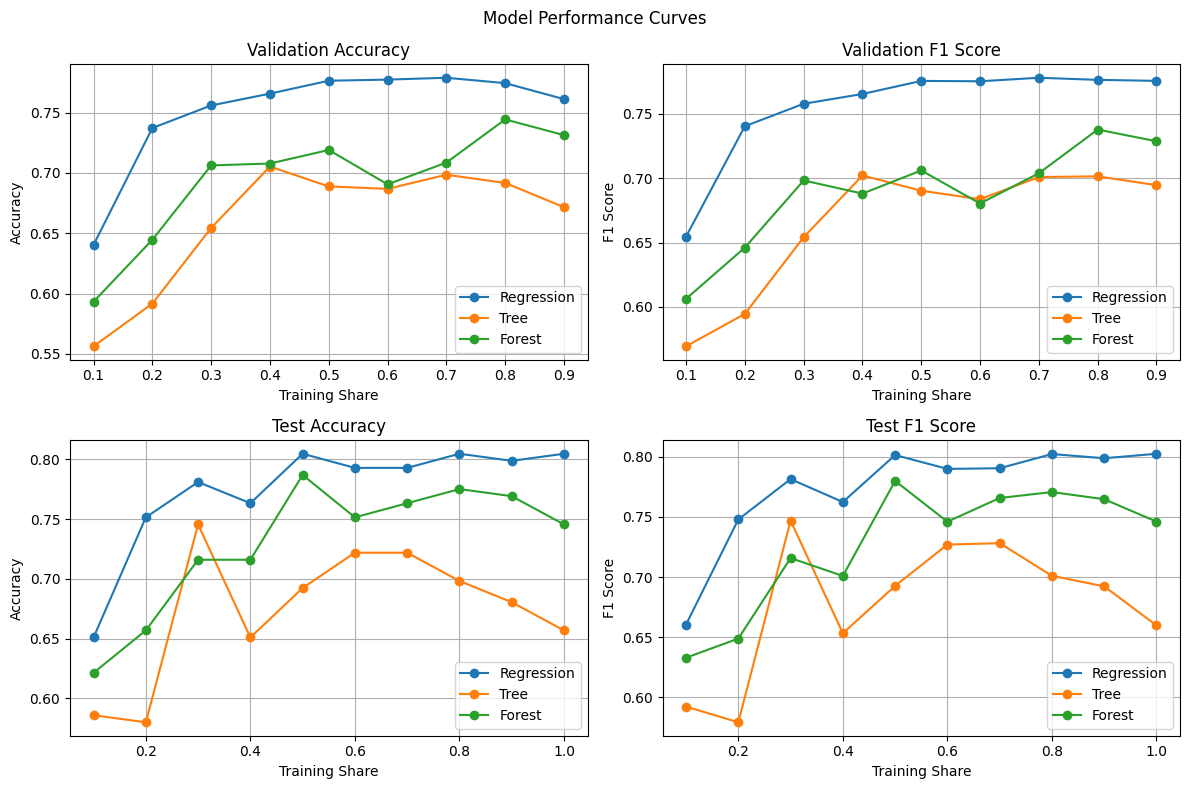

In [ ]:
regression_df = pd.DataFrame(regression_results)
tree_df = pd.DataFrame(tree_results)
forest_df = pd.DataFrame(forest_results)

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Model Performance Curves')

axs[0, 0].plot(regression_df[regression_df['share'] < 1]['share'], regression_df[regression_df['share'] < 1]['accuracy_val'], label='Regression', marker='o')
axs[0, 0].plot(tree_df[tree_df['share'] < 1]['share'], tree_df[tree_df['share'] < 1]['accuracy_val'], label='Tree', marker='o')
axs[0, 0].plot(forest_df[forest_df['share'] < 1]['share'], forest_df[forest_df['share'] < 1]['accuracy_val'], label='Forest', marker='o')
axs[0, 0].set_title('Validation Accuracy')
axs[0, 0].set_xlabel('Training Share')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].legend()
axs[0, 0].grid(True)

axs[0, 1].plot(regression_df[regression_df['share'] < 1]['share'], regression_df[regression_df['share'] < 1]['f1_val'], label='Regression', marker='o')
axs[0, 1].plot(tree_df[tree_df['share'] < 1]['share'], tree_df[tree_df['share'] < 1]['f1_val'], label='Tree', marker='o')
axs[0, 1].plot(forest_df[forest_df['share'] < 1]['share'], forest_df[forest_df['share'] < 1]['f1_val'], label='Forest', marker='o')
axs[0, 1].set_title('Validation F1 Score')
axs[0, 1].set_xlabel('Training Share')
axs[0, 1].set_ylabel('F1 Score')
axs[0, 1].legend()
axs[0, 1].grid(True)

axs[1, 0].plot(regression_df['share'], regression_df['accuracy_test'], label='Regression', marker='o')
axs[1, 0].plot(tree_df['share'], tree_df['accuracy_test'], label='Tree', marker='o')
axs[1, 0].plot(forest_df['share'], forest_df['accuracy_test'], label='Forest', marker='o')
axs[1, 0].set_title('Test Accuracy')
axs[1, 0].set_xlabel('Training Share')
axs[1, 0].set_ylabel('Accuracy')
axs[1, 0].legend()
axs[1, 0].grid(True)

axs[1, 1].plot(regression_df['share'], regression_df['f1_test'], label='Regression', marker='o')
axs[1, 1].plot(tree_df['share'], tree_df['f1_test'], label='Tree', marker='o')
axs[1, 1].plot(forest_df['share'], forest_df['f1_test'], label='Forest', marker='o')
axs[1, 1].set_title('Test F1 Score')
axs[1, 1].set_xlabel('Training Share')
axs[1, 1].set_ylabel('F1 Score')
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

- Graphs for test validation and for the test (I did the first one because it is more fairly to explore this type of results on it) are not the same but similar.
- The models trained on shares less than .5 seems weaker because the training data is too small.
- The right half seems pretty indistinguishable for the Logistic Regression and Random Forest models. Somehow Decision Tree overfits on shares after .7 (I think that is is just an accident).
- Optimal shares are from .5 to .8.

### 2.9. Boosting

Apply [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) to this problem.

Find optimal hyperparameters using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) or RandomizedSearchCV.

Hyperparameters to consider:
* depth of each tree
* number of decision trees
* learning rate

This model has more parameters than previous ones. I will use RandomizedSearchCV in this case.

We want to try different magnitudes of learning rate value. This for I will use loguniform.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform, randint

boosting_param_grid = {
    'max_depth'        : randint(3, 12),
    'n_estimators'     : randint(50, 500),
    'learning_rate'    : loguniform(1e-3, 1),
}

boosting = GradientBoostingClassifier(random_state=RANDOM_STATE)

MAX_ITER = 30

search = RandomizedSearchCV(
    boosting,
    param_distributions=boosting_param_grid,
    n_iter=MAX_ITER,
    cv=3,
    scoring='accuracy',
    random_state=RANDOM_STATE,
    verbose=1,
    n_jobs=-1,  # let's hope colab's two cores will help _/\_
)

search.fit(X_clean_scaled, y_clean['class'])

Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7cca7a1f8230>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7cca65f80710>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7cca7a1fa450>},
                   random_state=42, scoring='accuracy', verbose=1)

In [ ]:
boosting_best = search.best_estimator_
search.best_params_

{'learning_rate': np.float64(0.2795015916508335),
 'max_depth': 3,
 'n_estimators': 441}

In [ ]:
boosting_y_pred = boosting_best.predict(X_test_scaled)
boosting_accuracy = accuracy_score(y_test['class'], boosting_y_pred),
boosting_f1 = f1_score(y_test['class'], boosting_y_pred, average='weighted'),

In [ ]:
boosting_accuracy, boosting_f1

((0.7810650887573964,), (0.7824601344829027,))

Wierd, but ok...

In [ ]:
boosting_accuracy, boosting_f1 = boosting_accuracy[0], boosting_f1[0]

Finally, comparing the scores

In [ ]:
results = [
    {"name": "Logistic Regression", "accuracy": accuracy_regression, "f1": f1_regression},
    {"name": "Logistic Regression (PCA)", "accuracy": accuracy_pca_regression, "f1": f1_pca_regression},
    {"name": "Decision Tree", "accuracy": accuracy_decision_tree, "f1": f1_decision_tree},
    {"name": "Logistic Regression (Ensembles)", "accuracy": max([ensemble["accuracy"] for ensemble in ensembles_regression]), "f1": max([ensemble["f1"] for ensemble in ensembles_regression])},
    {"name": "Decision Tree (Ensembles)", "accuracy": max([ensemble["accuracy"] for ensemble in ensembles_dt]), "f1": max([ensemble["f1"] for ensemble in ensembles_dt])},
    {"name": "Random Forest", "accuracy": max([ensemble["accuracy"] for ensemble in random_forests]), "f1": max([ensemble["f1"] for ensemble in random_forests])},
    {"name": "Boosting", "accuracy": boosting_accuracy, "f1": boosting_f1},
]

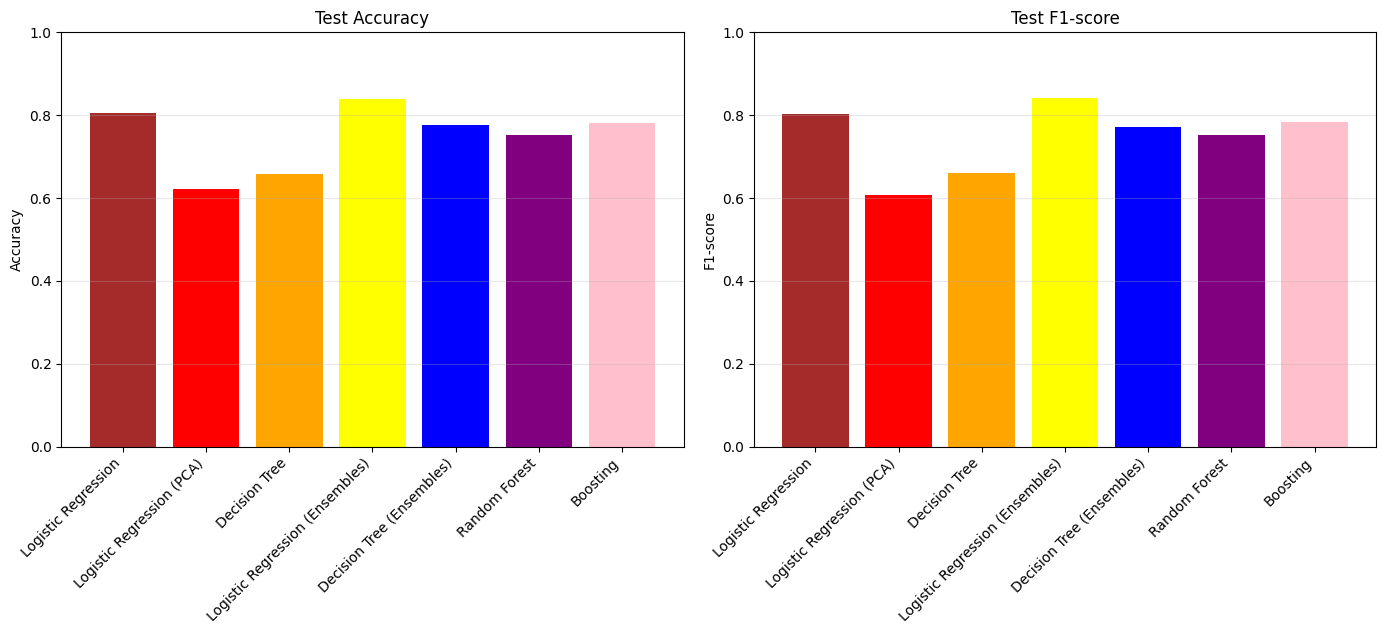

In [ ]:
names = [r["name"] for r in results]
accuracy = [r["accuracy"] for r in results]
f1 = [r["f1"] for r in results]
colors = ["brown", "red", "orange", "yellow", "blue", "purple", "pink"]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), sharey=False)

x_pos = np.arange(len(names))

bars1 = ax1.bar(x_pos, accuracy, color=colors)
ax1.set_title('Test Accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_ylim(0, 1)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(names, rotation=45, ha='right')
ax1.grid(axis='y', alpha=0.3)

bars2 = ax2.bar(x_pos, f1, color=colors)
ax2.set_title('Test F1-score')
ax2.set_ylabel('F1-score')
ax2.set_ylim(0, 1)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(names, rotation=45, ha='right')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()

Every model tested today is quiet good (from .6 to .85 accuracy). Models with trees are slightly worse than the corresponding models with regression while (as I remember) they train longer. The first (due to simplicity) and the last (due to the speed) are awesome ones.